# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1-3
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

#4-5
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
#7
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
from sklearn import datasets

data = datasets.load_wine()

x = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])
x.sample(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
73,12.99,1.67,2.60,30.0,139.0,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985.0
159,13.48,1.67,2.64,22.5,89.0,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620.0
30,13.73,1.50,2.70,22.5,101.0,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285.0
162,12.85,3.27,2.58,22.0,106.0,1.65,0.60,0.60,0.96,5.58,0.87,2.11,570.0
130,12.86,1.35,2.32,18.0,122.0,1.51,1.25,0.21,0.94,4.10,0.76,1.29,630.0
18,14.19,1.59,2.48,16.5,108.0,3.30,3.93,0.32,1.86,8.70,1.23,2.82,1680.0
146,13.88,5.04,2.23,20.0,80.0,0.98,0.34,0.40,0.68,4.90,0.58,1.33,415.0
149,13.08,3.90,2.36,21.5,113.0,1.41,1.39,0.34,1.14,9.40,0.57,1.33,550.0
116,11.82,1.47,1.99,20.8,86.0,1.98,1.60,0.30,1.53,1.95,0.95,3.33,495.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0


For 2 clusters, the score is 0.259
For 3 clusters, the score is 0.285
For 4 clusters, the score is 0.256
For 5 clusters, the score is 0.261
For 6 clusters, the score is 0.189
For 7 clusters, the score is 0.213
For 8 clusters, the score is 0.159
For 9 clusters, the score is 0.154


c:\users\eloi pc\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

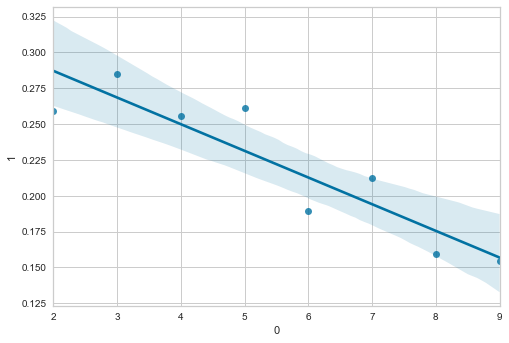

In [3]:
clust = 2
n = 8
scores = []
for i in range(0,n):
    #I escale the data, just in case
    scal = StandardScaler()
    w_std = scal.fit_transform(x, y)

    #We do the thing
    w_cluster = KMeans(n_clusters=clust, random_state=23)
    model = w_cluster.fit(w_std)

    #We get the predicts and score from the thing
    preds = model.predict(w_std)
    score = silhouette_score(w_std, preds,random_state=23)

    print("For", clust,"clusters, the score is", round(score,3))
    scores.append([clust,score])
    clust += 1
scores = pd.DataFrame(scores)
sns.regplot(scores[0], scores[1])

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [4]:
#Using the model on the initial cell, and creating a universal finder
n = 8
def cluster_scorer(c, df):
    return round(float(scores.loc[scores[0] == c][1]),3)


print(f"A model of {n} clusters has a score of {cluster_scorer(n,scores)}")

A model of 8 clusters has a score of 0.159


## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [5]:
#Using the function defined on the cell above
n = 5
def cluster_scorer(c, df):
    return round(float(scores.loc[scores[0] == c][1]),3)


print(f"A model of {n} clusters has a score of {cluster_scorer(n,scores)}")

A model of 5 clusters has a score of 0.261


## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [6]:
#Using the function defined on the cell above
n = 3
def cluster_scorer(c, df):
    return round(float(scores.loc[scores[0] == c][1]),3)


print(f"A model of {n} clusters has a score of {cluster_scorer(n,scores)}")

A model of 3 clusters has a score of 0.285


## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

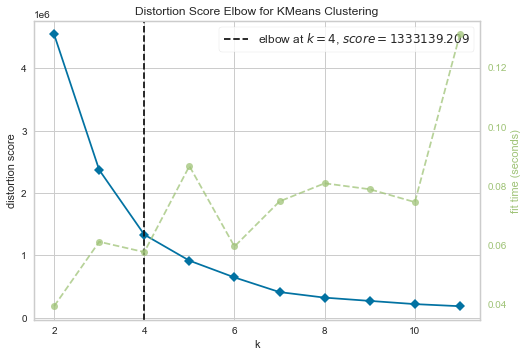

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
# 2 to 12 as a random k values, depending on how many I test the answer the model giveth is different
graph = KElbowVisualizer(model, k=(2,12), metric='distortion')

graph.fit(x)  
graph.show()        

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

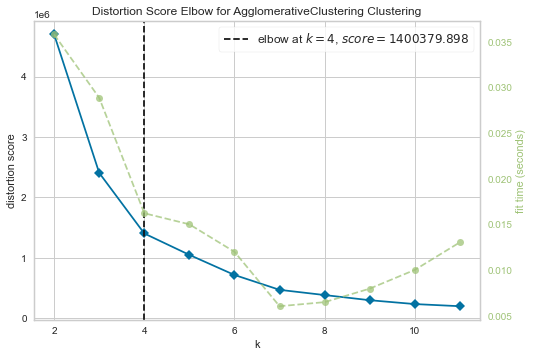

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
w_agg = AgglomerativeClustering()

graph2 = KElbowVisualizer(w_agg, k=(2,12))
graph2.fit(x)  
graph2.show()

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

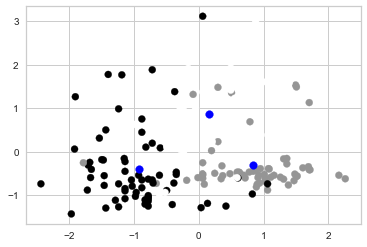

In [10]:
# Done at 3 in the morning, found on Stackoverflow. Dont ask why but looks nice
n = 3
def cluster_scorer(c, df):
    return round(float(scores.loc[scores[0] == c][1]),3)
cluster = KMeans(n_clusters=n, random_state=23)
mod = cluster.fit(w_std)

preds = cluster.fit_predict(w_std)
cen = cluster.cluster_centers_

plt.scatter(w_std[:,0], w_std[:,1], c=preds)
plt.scatter(cen[:,0], cen[:,1], c='blue', s=60)
plt.show()

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [12]:
scaler = StandardScaler()
scaler.fit(data["data"])

df = pd.DataFrame(data["data"], columns=data["feature_names"])
df_t = pd.Series(data["target"])
scaler.fit(df)
data_s = scaler.transform(df)
data_st = pd.DataFrame(data_s, columns = data['feature_names'] )
data_st

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


Text(0, 0.5, 'Second Component')

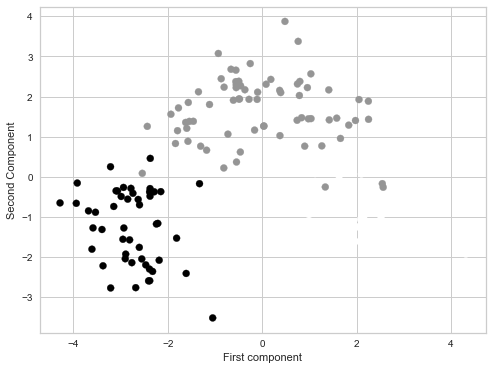

In [16]:
pca = PCA(n_components=2)
pca.fit(data_s)
pca_x = pca.transform(data_s)

plt.figure(figsize=(8,6))
plt.scatter(pca_x[:,0],pca_x[:,1], c = df_t)
plt.xlabel('First component')
plt.ylabel('Second Component')

## Bonus

## Generate a series of t-SNE plots showing the clusters at a variety of perplexities.